In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [2]:
# Import pour les différents modèles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

In [3]:
# REGRESSION LOGISTIQUE 

lr_model = LogisticRegression(max_iter=1000, random_state=25)
lr_model.fit(X_train, y_train)

# Prédiction
y_pred_lr = lr_model.predict(X_test)

# Rapport
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Score
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = report_lr["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(lr_model, "Models/logistic_regression.pkl")
np.save("Predictions/y_pred_lr.npy", y_pred_lr)

Accuracy: 0.8041237113402062

Classification Report:
               precision    recall  f1-score   support

          10       0.40      0.61      0.48       623
          40       0.70      0.63      0.67       496
          50       0.78      0.81      0.79       329
          60       0.89      0.85      0.87       163
        1140       0.77      0.81      0.79       533
        1160       0.92      0.91      0.92       790
        1180       0.58      0.67      0.62       153
        1280       0.78      0.55      0.64       969
        1281       0.52      0.56      0.54       408
        1300       0.88      0.93      0.90      1001
        1301       0.94      0.93      0.93       139
        1302       0.79      0.81      0.80       475
        1320       0.82      0.79      0.81       645
        1560       0.84      0.81      0.82      1000
        1920       0.87      0.93      0.90       816
        1940       0.83      0.95      0.89       160
        2060       0.80    

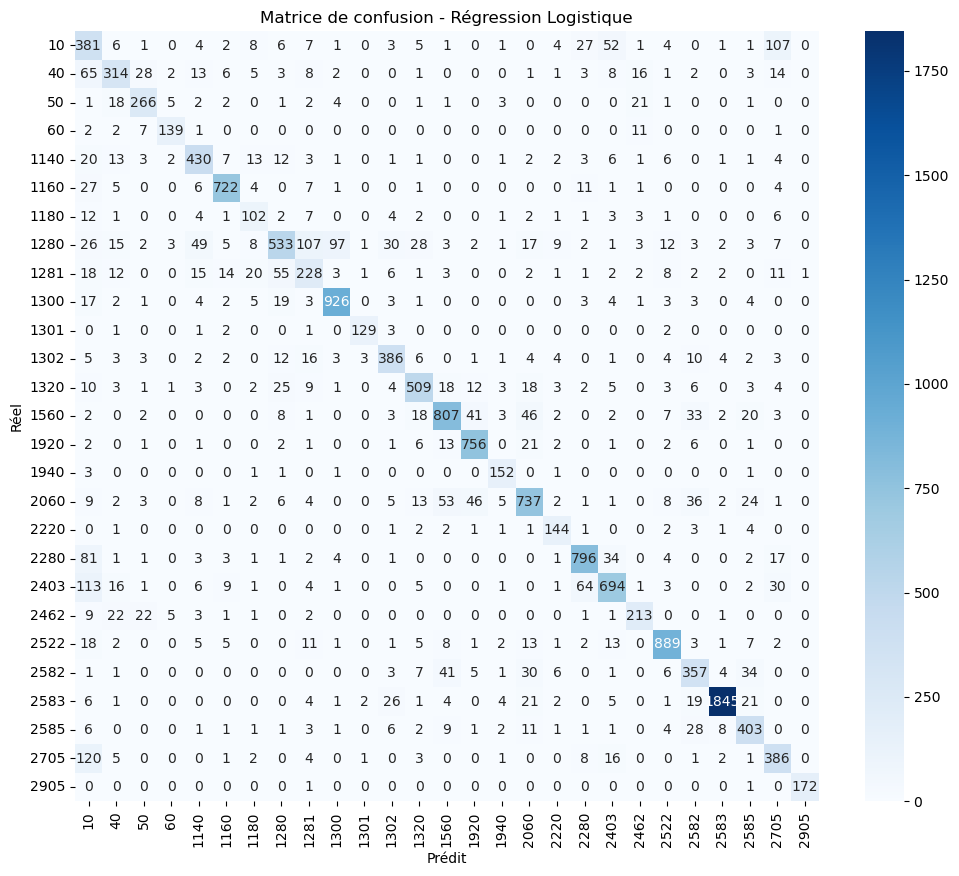

In [4]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

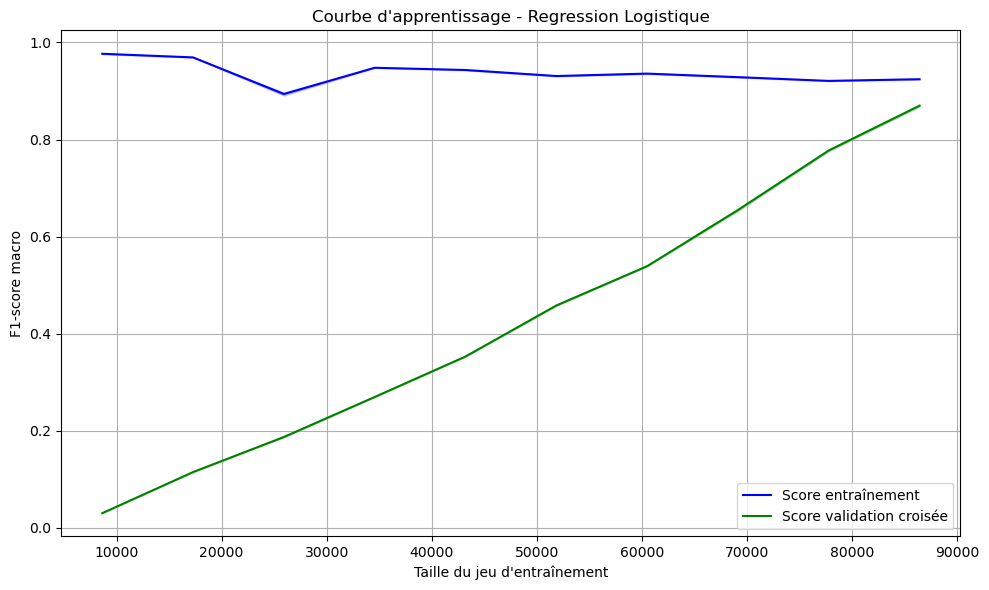

In [6]:
# Courbe d'apprentissage

from sklearn.model_selection import learning_curve, StratifiedKFold

train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=1000, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Regression Logistique")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Importance des mots

import pandas as pd
import numpy as np

# Récupère les noms de mots
feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_

# Pour les 5 mots les plus importants par classe
for i, class_label in enumerate(lr_model.classes_):
    top_features = np.argsort(coefficients[i])[-5:]
    print(f"\nClasse {class_label} : Top mots")
    for feat in reversed(top_features):
        print(f"  {feature_names[feat]} ({coefficients[i][feat]:.3f})")


Classe 10 : Top mots
  livre (4.218)
  guide (3.795)
  tom (3.542)
  histoire (3.518)
  tome (3.202)

Classe 40 : Top mots
  magideal (12.158)
  import (9.583)
  description (6.857)
  version (6.109)
  controleur (5.065)

Classe 50 : Top mots
  skylander (7.202)
  nintendo (7.100)
  ps4 (6.830)
  gaming (6.340)
  manette (5.658)

Classe 60 : Top mots
  console (9.168)
  nintendo (7.843)
  playstation (5.801)
  go (5.612)
  to (5.501)

Classe 1140 : Top mots
  figurine (13.401)
  shirt (8.911)
  gundam (6.606)
  magnet (6.457)
  pvc (5.852)

Classe 1160 : Top mots
  vf (9.752)
  mtg (9.256)
  carte (8.540)
  vo (7.936)
  pokemon (7.899)

Classe 1180 : Top mots
  heroclix (11.308)
  warhammer (9.629)
  oop (6.583)
  role (6.568)
  miniature (5.995)

Classe 1280 : Top mots
  doudou (8.615)
  rc (6.961)
  figurine (6.882)
  dji (6.127)
  jouet (6.070)

Classe 1281 : Top mots
  jeu (10.150)
  carte (8.588)
  propos (5.999)
  joueur (5.990)
  jouet (5.408)

Classe 1300 : Top mots
  generiqu

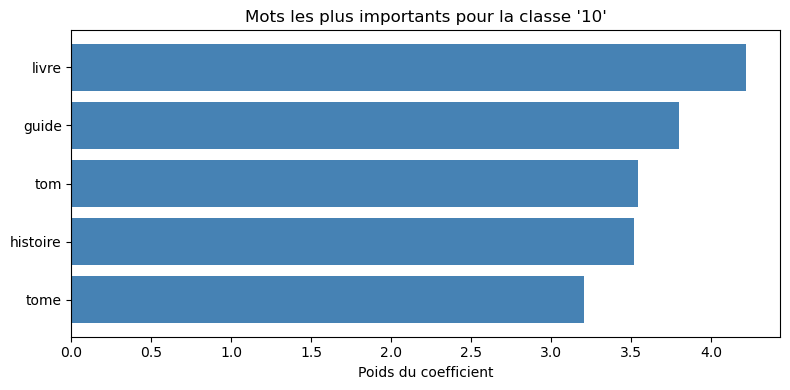

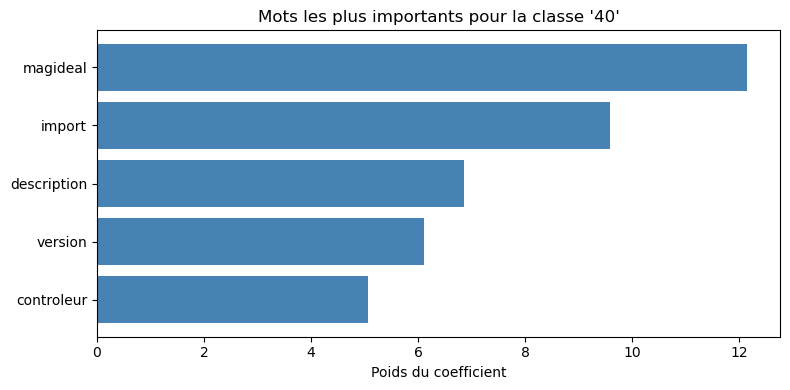

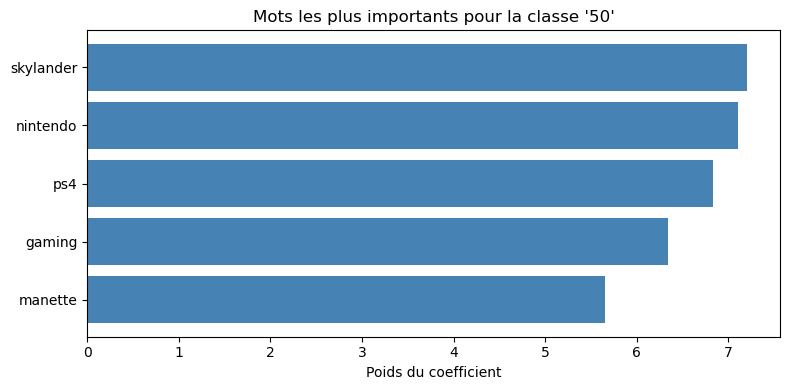

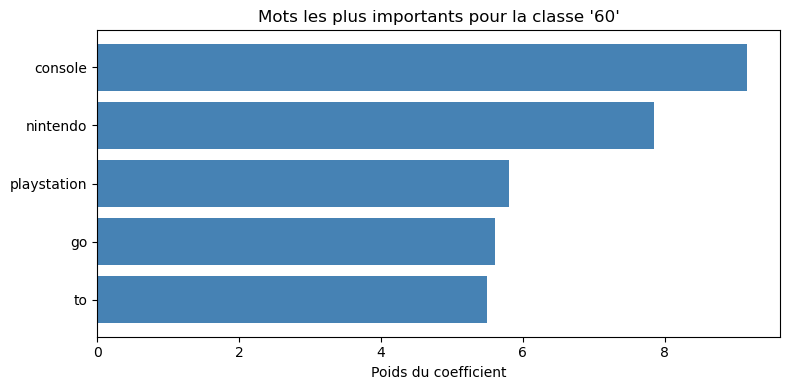

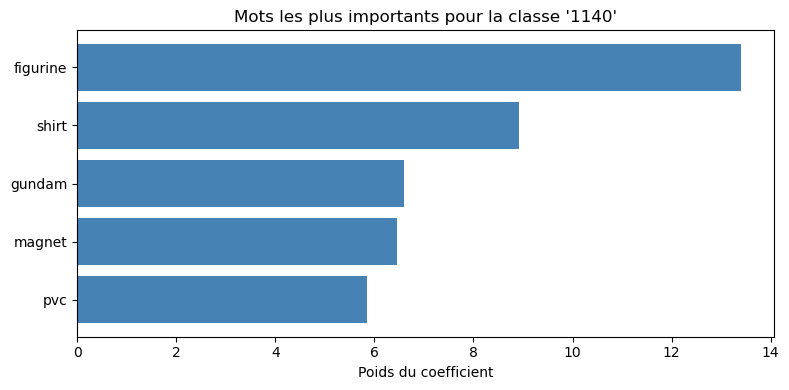

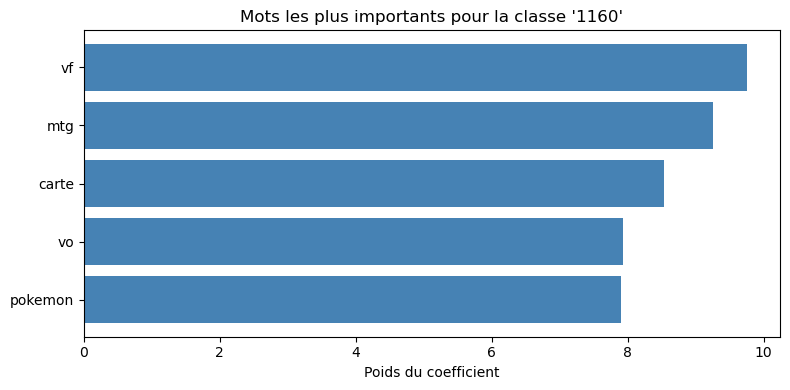

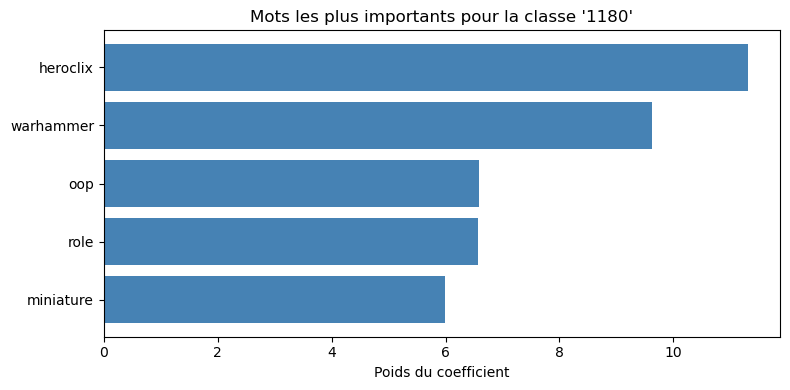

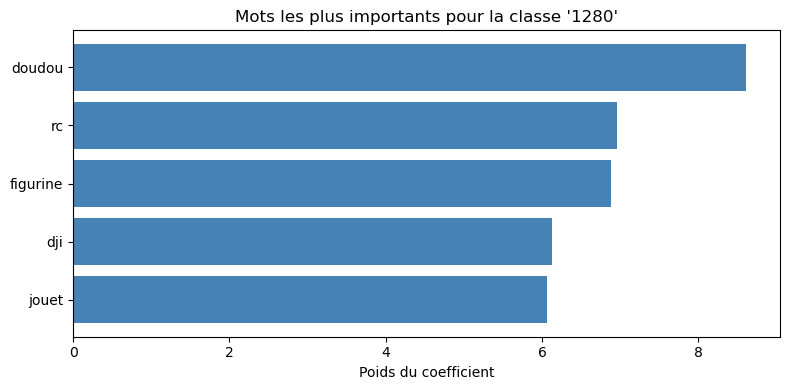

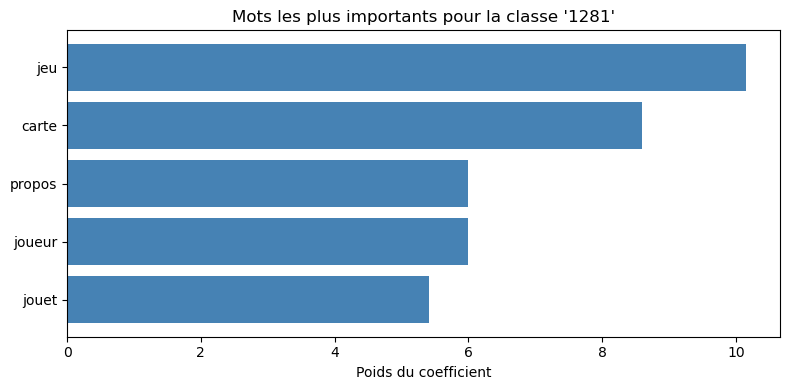

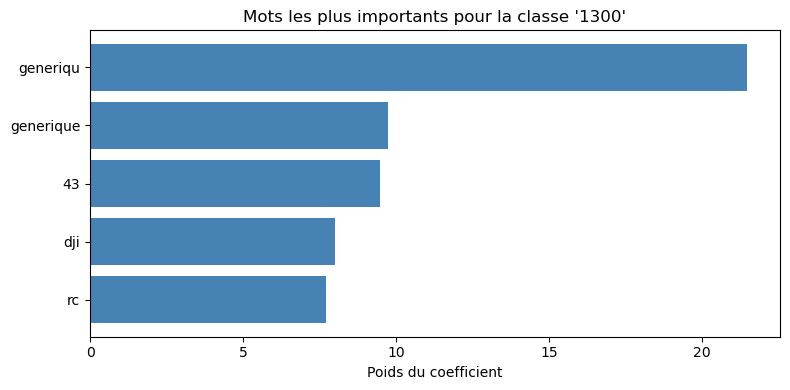

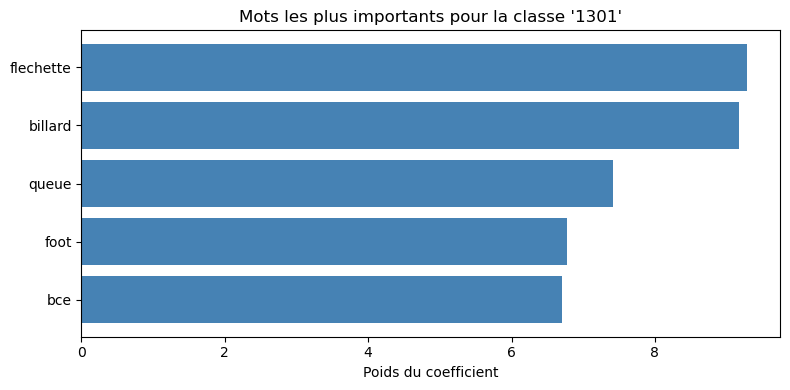

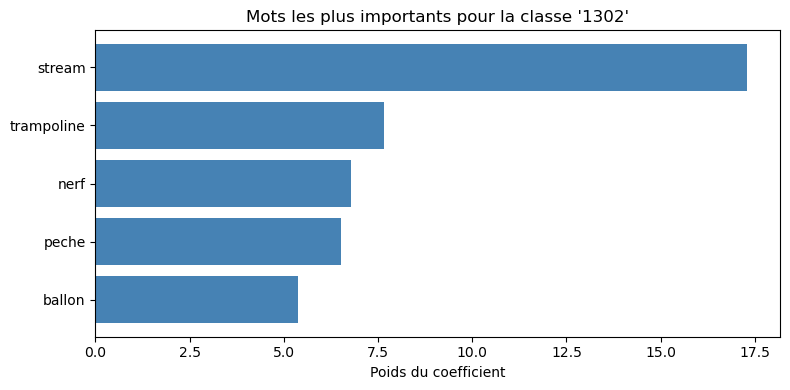

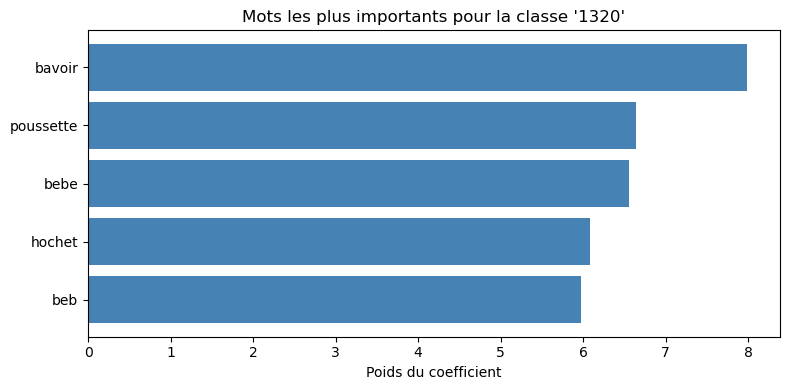

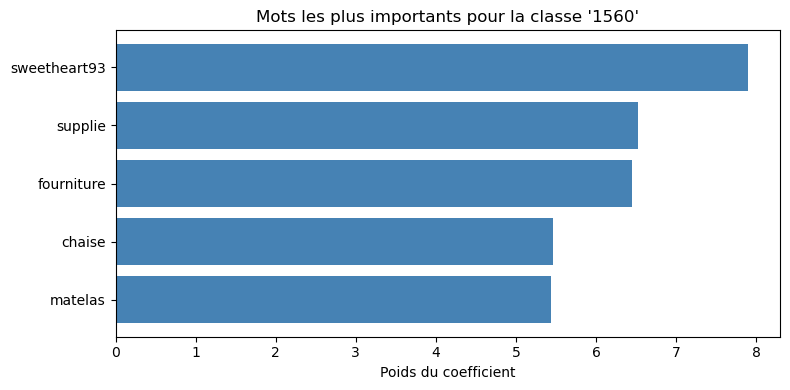

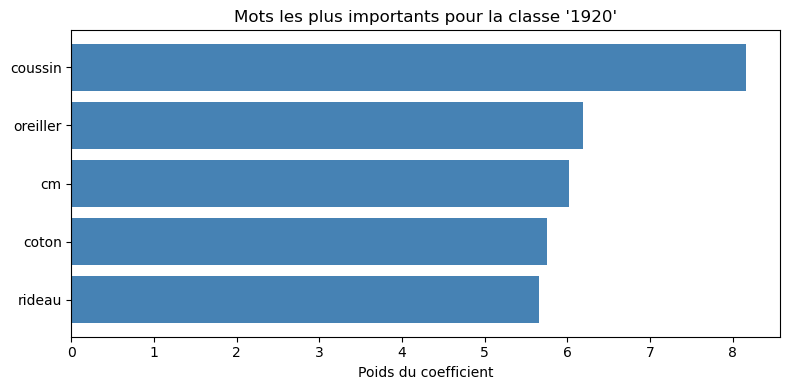

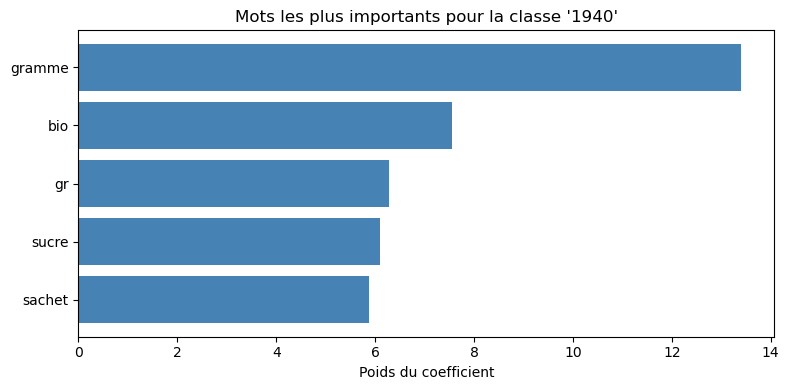

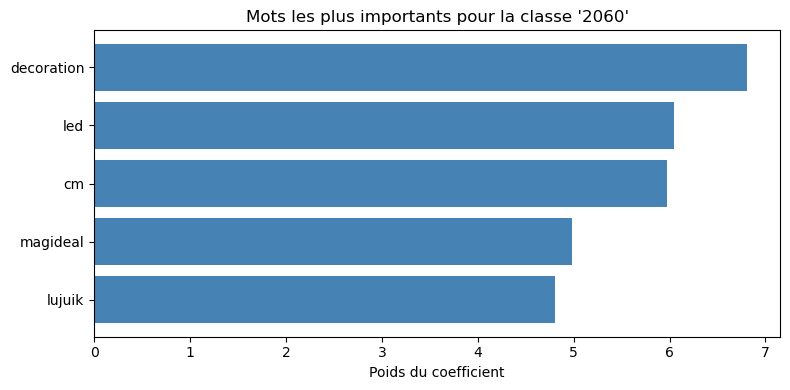

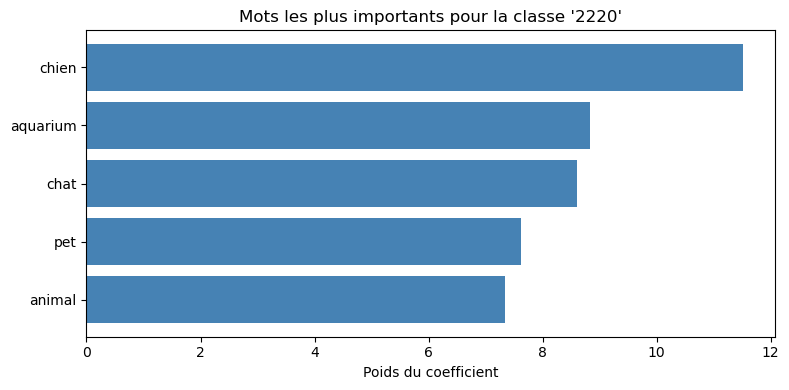

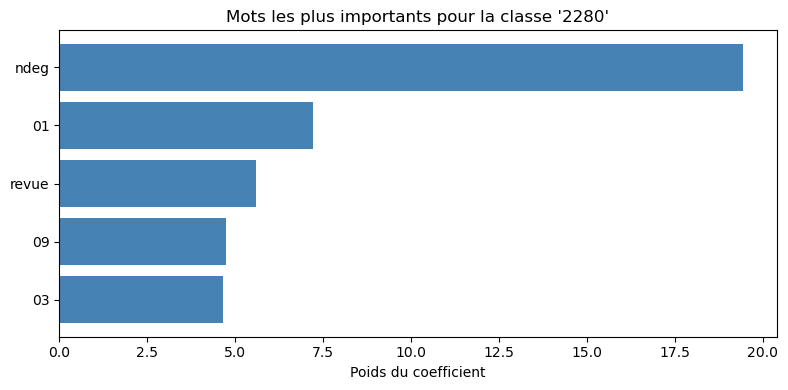

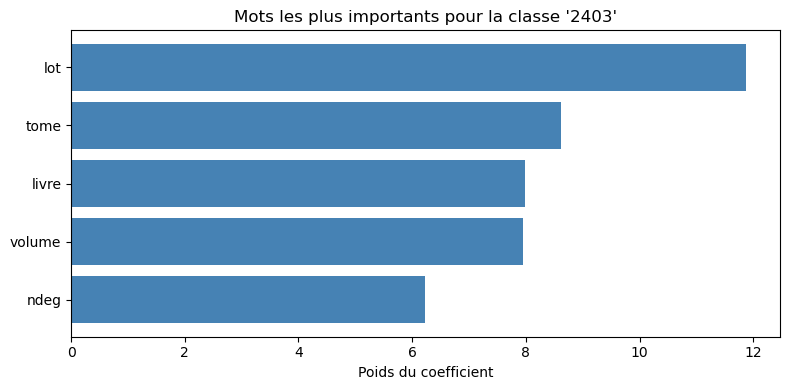

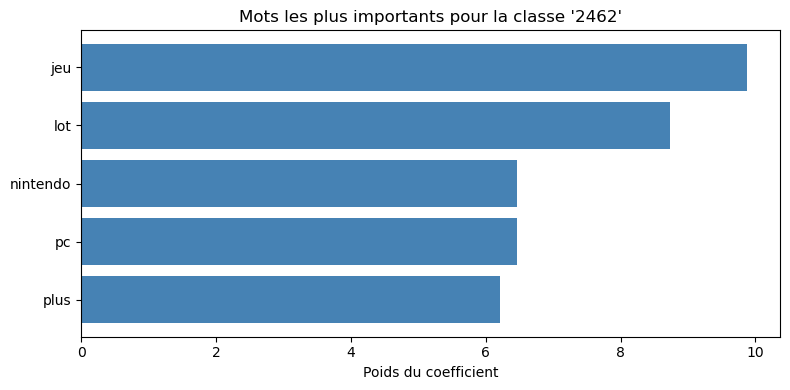

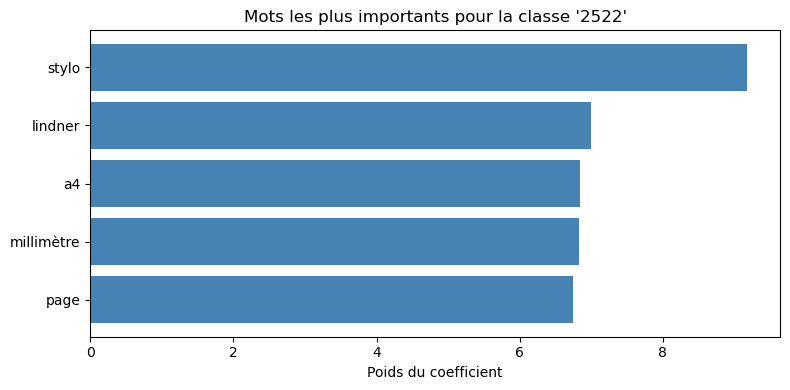

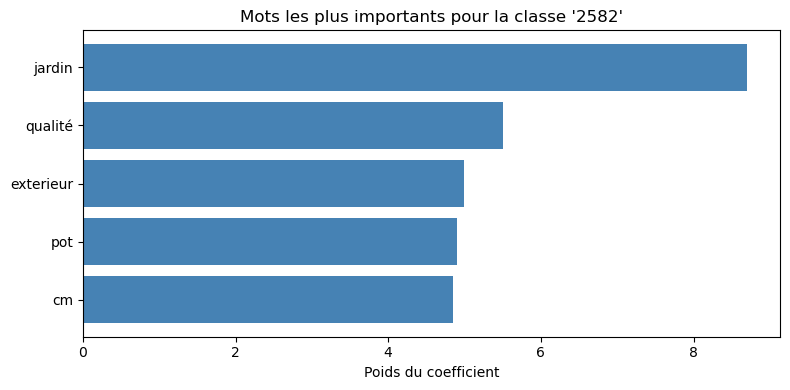

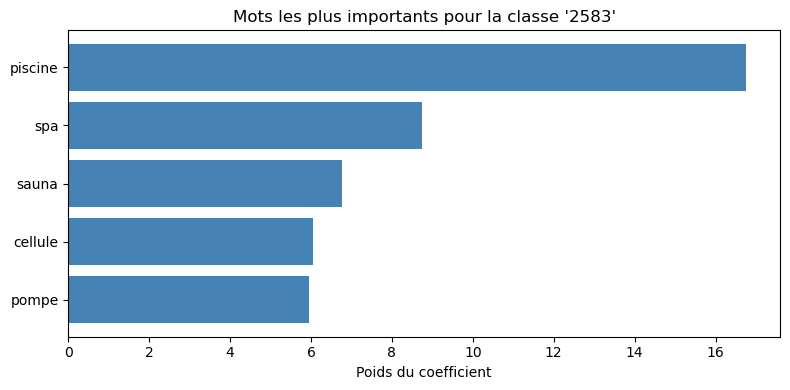

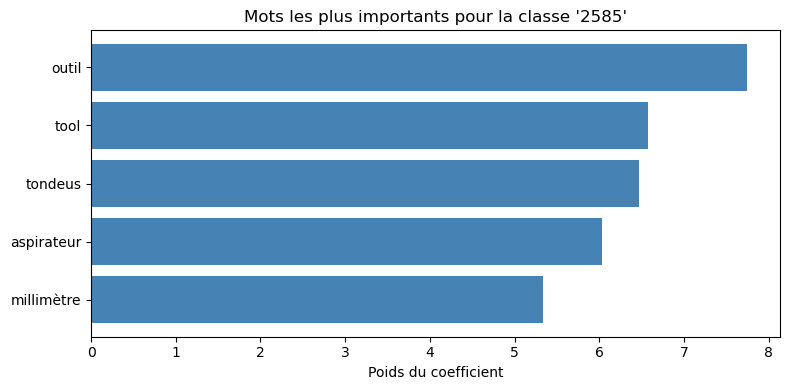

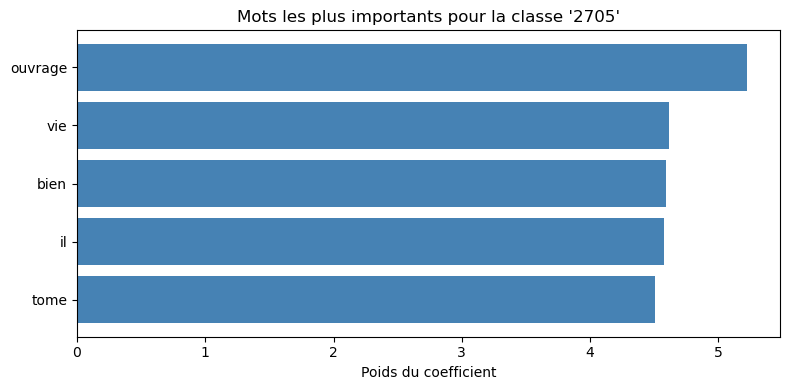

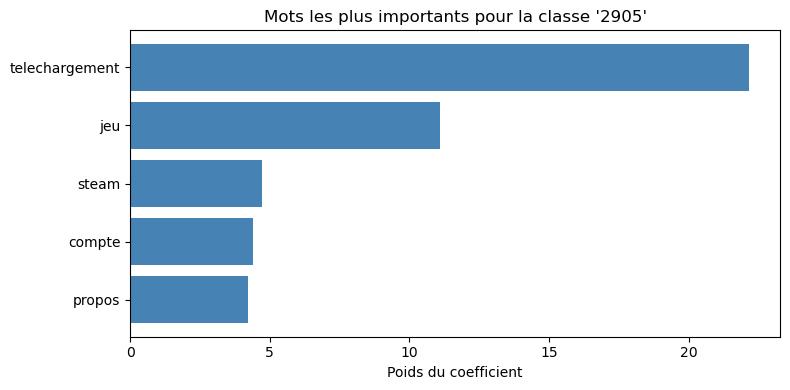

In [9]:
import matplotlib.pyplot as plt

for i, class_label in enumerate(lr_model.classes_):
    top_feats_idx = np.argsort(coefficients[i])[-5:]
    top_feats = feature_names[top_feats_idx]
    top_coefs = coefficients[i][top_feats_idx]

    plt.figure(figsize=(8, 4))
    plt.barh(top_feats, top_coefs, color="steelblue")
    plt.xlabel("Poids du coefficient")
    plt.title(f"Mots les plus importants pour la classe '{class_label}'")
    plt.tight_layout()
    plt.show()